<a href="https://colab.research.google.com/github/BrajanNieto/MISTI/blob/main/2026_Housing_DataExploration_STUDENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Feature Engineering with California Census Data Student Version
###Ingeniería de Características con Datos del Censo de California Versión de Estudiante

#Feature Engineering with California Census Data English Version (Version Inglés)

**If you haven't already, please hit :**

`File` -> `Save a Copy in Drive`

**to copy this notebook to your Google drive, and work on a copy. If you don't do this, your changes won't be saved!**

In [1]:
import numpy as np # a package for manipulating numbers and using arrays
import pandas as pd

import matplotlib.pyplot as plt # a package with plotting capabilities
import seaborn as sns # a package for data visualization

from sklearn.linear_model import LinearRegression # a package with an optimized LinearRegression class
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.datasets import fetch_california_housing
from sklearn.datasets import fetch_openml

**Load the California Housing data**

In [2]:
# Load the data
california_housing = fetch_openml(name="california_housing", version=1, as_frame=True)

**Bunch data type**

In [3]:
# Check type
type(california_housing)

sklearn.utils._bunch.Bunch

**Pandas DataFrame**

In [4]:
# Convert to dataframe
california_housing_df = california_housing.frame
# Check type
type(california_housing_df)

pandas.core.frame.DataFrame

**Check shape**

In [7]:
california_housing_df.shape

(20640, 10)

**Use the info function**

What do you notice?

In [9]:
california_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  int64   
 3   total_rooms         20640 non-null  int64   
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  int64   
 6   households          20640 non-null  int64   
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  int64   
 9   ocean_proximity     20640 non-null  category
dtypes: category(1), float64(4), int64(5)
memory usage: 1.4 MB


**Check for null values**

Are there null values? If so, how many and which feature?

In [10]:
california_housing_df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


**Display subset of null values**

In [11]:
null_rows_df = california_housing_df[california_housing_df.isnull().any(axis=1)]
display(null_rows_df.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,161900,NEAR BAY
341,-122.17,37.75,38,992,NaN,732,259,1.6196,85100,NEAR BAY
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,173400,NEAR BAY
563,-122.24,37.75,45,891,NaN,384,146,4.9489,247100,NEAR BAY
696,-122.10,37.69,41,746,NaN,387,161,3.9063,178400,NEAR BAY


## Categorical Variables

**What are the categorical variables?**

In [12]:
california_housing_df['ocean_proximity'].unique()

['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']
Categories (5, object): ['<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'INLAND', 'ISLAND']

**Apply One-Hot Encoding to "ocean_proximity"**

---



In [13]:
# Apply one-hot encoding to 'ocean_proximity'
california_housing_df = pd.get_dummies(california_housing_df, columns=['ocean_proximity'], drop_first=True)

# Rename the newly created one-hot encoded columns
new_column_names = {}
for col in california_housing_df.columns:
    if col.startswith('ocean_proximity_'):
        original_suffix = col.replace('ocean_proximity_', '')
        new_suffix = original_suffix.lower().replace(' ', '_')
        new_column_names[col] = f'op_{new_suffix}'

california_housing_df.rename(columns=new_column_names, inplace=True)

# Display the first few rows of the new DataFrame to see the changes
display(california_housing_df.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,op_near_bay,op_near_ocean,op_inland,op_island
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,True,False,False,False
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,True,False,False,False
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,True,False,False,False
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,True,False,False,False
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,True,False,False,False


**Keep target variable at the end**

In [14]:
# Get all column names
cols = california_housing_df.columns.tolist()

# Remove 'median_house_value' from its current position
if 'median_house_value' in cols:
    cols.remove('median_house_value')

# Add 'median_house_value' to the end of the list
cols.append('median_house_value')

# Reindex the DataFrame with the new column order
california_housing_df = california_housing_df[cols]

# Display the first few rows to confirm the change
display(california_housing_df.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,op_near_bay,op_near_ocean,op_inland,op_island,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,True,False,False,False,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,True,False,False,False,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,True,False,False,False,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,True,False,False,False,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,True,False,False,False,342200


## Explore and Understand the California Housing Dataset

**Refer to Notion for dataset explaination.**

In [15]:
california_housing.details

{'id': '43939',
 'name': 'california_housing',
 'version': '1',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2022-06-06T11:27:34',
 'licence': 'public',
 'url': 'https://openml.org/data/v1/download/22102987/california_housing.arff',
 'parquet_url': 'https://data.openml.org/datasets/0004/43939/dataset_43939.pq',
 'file_id': '22102987',
 'default_target_attribute': 'median_house_value',
 'visibility': 'public',
 'original_data_url': 'https://www.kaggle.com/datasets/camnugent/california-housing-prices',
 'status': 'active',
 'processing_date': '2022-06-06 11:28:03',
 'md5_checksum': '38cc9f7060e510f2f9f8072e250c5c35'}

In [16]:
california_housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'op_near_bay', 'op_near_ocean', 'op_inland', 'op_island',
       'median_house_value'],
      dtype='object')

**Rename Columns (not used)**

In [ ]:
# california_housing_df.rename(columns={'Longitude': 'longitude'}, inplace=True)
# california_housing_df.rename(columns={'Latitude': 'latitude'}, inplace=True)
# california_housing_df.rename(columns={'HouseAge': 'housing_median_age'}, inplace=True)
# california_housing_df.rename(columns={'AveRooms': 'total_rooms'}, inplace=True)
# california_housing_df.rename(columns={'AveBedrms': 'total_bedrooms'}, inplace=True)
# california_housing_df.rename(columns={'Population': 'population'}, inplace=True)
# california_housing_df.rename(columns={'AveOccup': 'households'}, inplace=True)
# california_housing_df.rename(columns={'MedInc': 'median_income'}, inplace=True)
# california_housing_df.rename(columns={'MedHouseVal': 'median_house_value'}, inplace=True)

### EXERCISE: Explore and Understand the California Housing Dataset

Explore a pandas dataframe version of the data using the following code:

- `california_housing_df.head()` ,
- `california_housing_df.describe()` .

In [17]:
california_housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,op_near_bay,op_near_ocean,op_inland,op_island,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,True,False,False,False,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,True,False,False,False,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,True,False,False,False,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,True,False,False,False,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,True,False,False,False,342200


In [18]:
california_housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Visualize and Interpret Features

* How would you interpret the histograms of the features and label of the California Housing dataset?

### EXERCISE: Visualize Distributions in the California Housing Dataset

In this exercise, you’ll create histograms for each feature in the California housing dataset to visualize the data distributions. This will help you understand the range, shape, and spread of each feature.

1. **Create the Histograms:**
   - Use `california_housing_df.hist()` to generate histograms for each feature in the dataset.
   - Set the following parameters to enhance the visual appearance:
     - `bins=50` to control the number of bins in each histogram for better granularity.
  - Set the following parameters to enhance the visual appearance:
    - `bins=50` to control the number of bins in each histogram for better granularity.
    - `figsize=(10, 6)` to adjust the overall size
    - `color='skyblue'` to set a pleasing color.
    - `edgecolor='black'` to outline each bar for clarity.

<Figure size 1000x600 with 0 Axes>

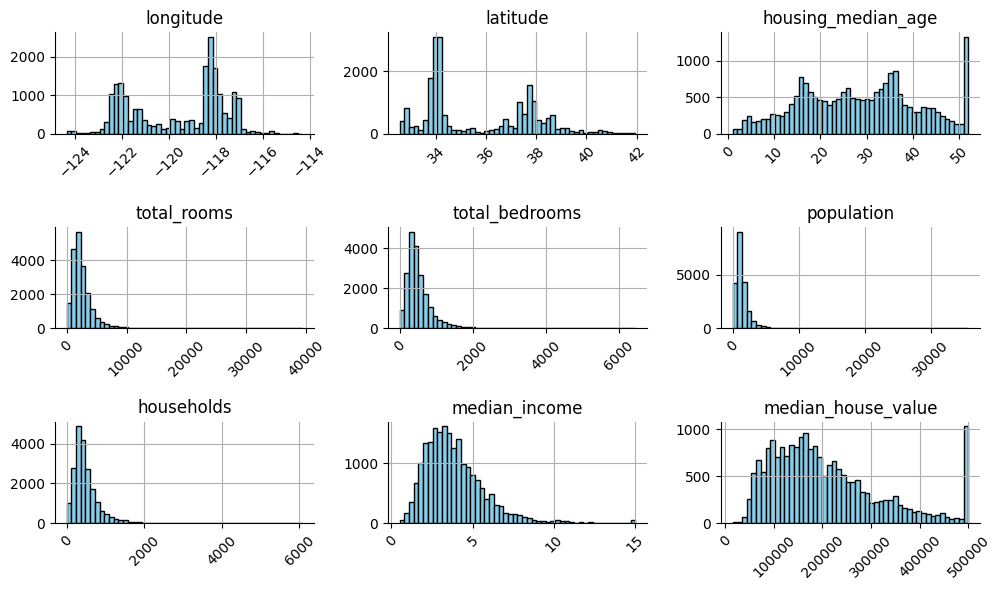

In [19]:
# Generate the histograms for the California housing data with adjustments for a prettier plot
plt.figure(figsize=(10, 6))  # Set a larger figure size for better visibility
axes = california_housing_df.hist(bins=50, figsize=(10, 6), color='skyblue', edgecolor='black') # Create the histograms

# Rotate x-axis labels for each subplot
for ax in axes.flatten():
    ax.tick_params(axis='x', rotation=45)

# Use sns.despine to remove the top and right spines
sns.despine()

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### EXERCISE: Visualize California Housing Prices by Geographic Location


* Where are the most expensive houses located?

How does this relate to the geography of California?
In this exercise, you’ll create a scatter plot to visualize how house prices vary by location across California. Each point will represent a location, and the color will indicate the median house value, helping you to see any geographic trends in housing prices.

1. **Create the Scatter Plot:**
   - Plot `longitude` on the x-axis and `latitude` on the y-axis.
   - Use the `median_house_value` column to set the color (`c`) of each point, and adjust the size of the points to `s=10` for visibility.

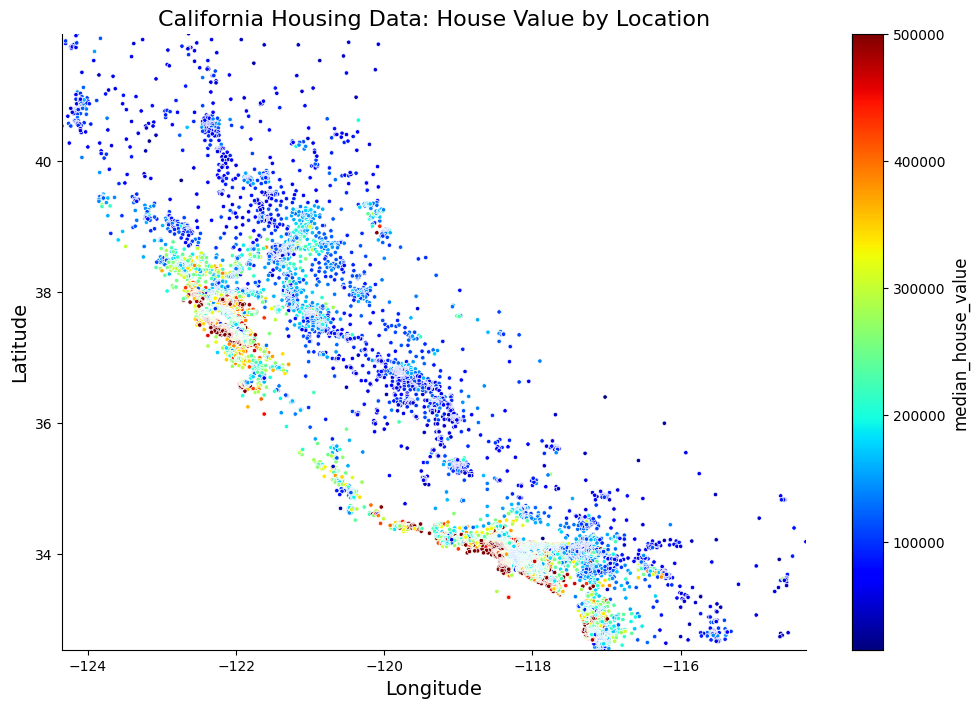

In [20]:
# Create a scatter plot with adjustments
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    california_housing_df['longitude'],
    california_housing_df['latitude'],
    s=10,
    c=california_housing_df['median_house_value'],
    cmap="jet",
    edgecolor='w',
    linewidth=0.5
)

# Set plot limits to avoid extreme outliers
plt.xlim([california_housing_df["longitude"].min(), california_housing_df["longitude"].max()])
plt.ylim([california_housing_df["latitude"].min(), california_housing_df["latitude"].max()])

# Add a colorbar with a label
cbar = plt.colorbar(scatter)
cbar.set_label('median_house_value', fontsize=12)

# Add labels and a title
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.title("California Housing Data: House Value by Location", fontsize=16)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()


## Visualize Relationships between Input and Output Data

### EXERCISE: Assess Feature Correlations and Build a Predictive Model

In this exercise, you’ll take a statistics-based approach to identify the most useful feature for predicting house prices. You’ll evaluate correlations, visualize relationships, and train a model using the strongest predictor.

1. **Calculate Correlations:**
   - Use the `.corr()` method on `california_housing_df` to generate the correlation matrix, showing the correlation coefficient \( r \) for each variable pair.


2. **Visualize the Correlation Matrix:**
   - Use `sns.heatmap()` to visualize the correlation matrix.

3. **Identify the Strongest Predictor:**
   - Examine the correlation values in the `median_house_value` row or column. Identify the feature with the highest positive correlation to `median_house_value`.

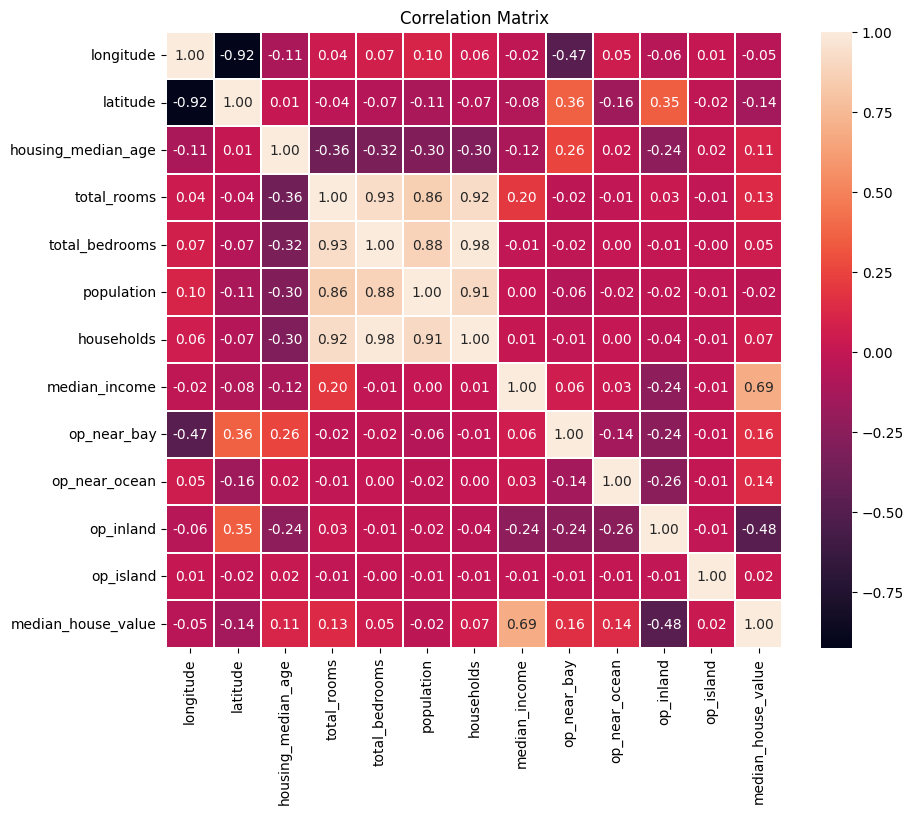

In [21]:
# Generate correlation matrix with the encoded data
corr_matrix = california_housing_df.corr()  # create the correlation matrix

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidth=.3, square=True)
plt.title('Correlation Matrix')
plt.show()

### EXERCISE: Visualizing Feature Relationships with Pair Plots

In this exercise, you will use a pair plot to spot non-linear relationships, outliers, and data clustering that a simple correlation coefficient might hide.



1.   **Generate a Pair Plot:**
      - Use `sns.pairplot()` on a subset of california_housing_df.

      - Tip: Pair plots can be computationally expensive. Start by dropping the following columns `"longitude", "latitude", "op_near_bay", "op_near_ocean", "op_inland", "op_island"` to keep the visualization clear and fast.


2.  **Analyze the Diagonal (Distribution):**

      - Observe the plots along the diagonal (where a feature meets itself). These are typically histograms or KDE (Kernel Density Estimate) plots.

      - Look for skewness or multi-modal distributions (multiple peaks) in features like median_income.

3.  **Inspect the Scatter Plots (Relationships):**

      - Identify Patterns: Is the relationship a straight line, or does it curve? Do you see a horizontal line at the top of the median_house_value axis? (This often indicates a "cap" or limit in the dataset).

In [ ]:
# Drop the unwanted columns
columns_drop = [__________________________________________]
subset = california_housing_df.drop(columns=columns_drop)
# Quantize the target and keep the midpoint for each interval
subset["median_house_value"] = pd.qcut(subset["median_house_value"], 6, retbins=False)
subset["median_house_value"] = subset["median_house_value"].apply(lambda x: x.mid)

_ = sns.pairplot(data=subset, hue="median_house_value", palette="viridis")

## Train a Model


* Add the names of the columns to the X feature vector below and then run the code
* Assess your model performance with the mean squared error and the squared correlation coefficient (the coeffcient of determination)



### EXERCISE: Build a Predictive Model with Best Features

1. **Train a Linear Regression Model with the Best Feature:**
   - Select this feature as `X` (input variable) and set `y` to `median_house_value`.
   - Train a `LinearRegression` model using this single feature.

2. **Evaluate and Visualize Model Performance:**
   - Generate predictions for `X` and create a scatter plot comparing `y` (true values) and the predictions to assess model accuracy.

**Use Features:** `"op_island", "households", "population", "latitude"`

In [ ]:
# Select features and the target variable
X = california_housing_df[______________________________]
y = california_housing_df[__________]

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Predict the target variable on the test set
y_pred = model.predict(X)

# Evaluate the model performance using Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate the R-squared score for the test set
r_squared = model.score(X, y)
print(f"R-squared Score: {r_squared}")

# Optional: Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(_____, _____, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2, label='Ideal Fit')  # Best-fit line
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Median House Value')
plt.show()

# Optional: Display the coefficients of the features
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

**Use Features:** *median_income, op_inland, latitude, total_rooms, op_near_ocean*

Mean Squared Error: 7011311502.929527
R-squared Score: 0.47344749180719903


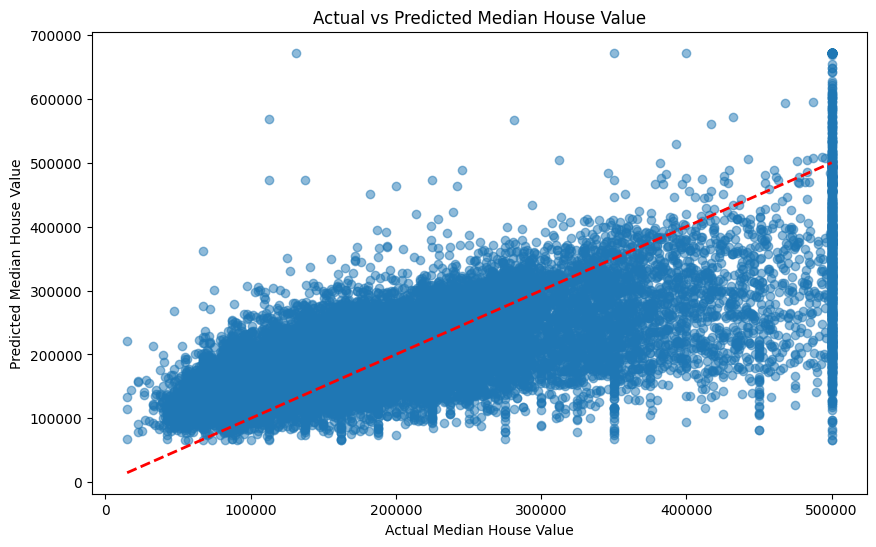

                Coefficient
median_income  41793.849202


In [28]:
# Select features and the target variable
X = california_housing_df[['median_income']]
y = california_housing_df['median_house_value']

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Predict the target variable on the test set
y_pred = model.predict(X)

# Evaluate the model performance using Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate the R-squared score for the test set
r_squared = model.score(X, y)
print(f"R-squared Score: {r_squared}")

# Optional: Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2, label='Ideal Fit')  # Best-fit line
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Median House Value')
plt.show()

# Optional: Display the coefficients of the features
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

#Ingeniería de Características con Datos del Censo de California Versión Español (Spanish Version)

**Si aún no lo has hecho, presiona:**

`File` -> `Save a Copy in Drive`

**para copiar este cuaderno a su unidad de Google y trabajar en una copia. ¡Si no haces esto, tus cambios no se guardarán!**

In [ ]:
import numpy as np # un paquete para manipular números y usar matrices
import pandas as pd

import matplotlib.pyplot as plt # un paquete con capacidades de graficación
import seaborn as sns # un paquete para visualización de datos

from sklearn.linear_model import LinearRegression # un paquete con una clase optimizada de regresión lineal
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.datasets import fetch_california_housing

**Cargar los datos de vivienda de California**

In [ ]:
# Cargar los datos
california_housing = fetch_openml(name="california_housing", version=1, as_frame=True)

**Tipo de datos Bunch**

In [ ]:
# Verificar el tipo de dato
type(california_housing)

**Pandas DataFrame**

In [ ]:
# Comprobar tipo
california_housing_df = california_housing.frame
# Comprobar tipo
type(california_housing_df)

**Comprobar  shape**

In [ ]:
california_housing_df._____

**Usa la función info**

¿Qué notas?

In [ ]:
california_housing_df._____

**Comprobar valores nulos**

¿Hay valores nulos? Si es así, ¿cuántos y en qué característica?

In [ ]:
california_housing_df._____._____

**Mostrar subconjunto de valores nulos**

In [ ]:
null_rows_df = california_housing_df[california_housing_df.isnull().any(axis=1)]
display(null_rows_df.head())

## Variables Categóricas

**¿Cuáles son las variables categóricas?**

In [ ]:
california_housing_df['ocean_proximity'].unique()

****Aplicar Codificación One-Hot a `"ocean_proximity"`****

In [ ]:
# Apply one-hot encoding to 'ocean_proximity'
california_housing_df = pd.get_dummies(california_housing_df, columns=[___________], drop_first=True)

# Rename the newly created one-hot encoded columns
new_column_names = {}
for col in california_housing_df.columns:
    if col.startswith('ocean_proximity_'):
        original_suffix = col.replace('ocean_proximity_', '')
        new_suffix = original_suffix.lower().replace(' ', '_')
        new_column_names[col] = f'op_{new_suffix}'

california_housing_df.rename(columns=new_column_names, inplace=True)

# Display the first few rows of the new DataFrame to see the changes
display(california_housing_df.head())

**Mantener la variable objetivo al final**

In [ ]:
# Get all column names
cols = california_housing_df.columns.tolist()

# Remove 'median_house_value' from its current position
if 'median_house_value' in cols:
    cols.remove('median_house_value')

# Add 'median_house_value' to the end of the list
cols.append('median_house_value')

# Reindex the DataFrame with the new column order
california_housing_df = california_housing_df[cols]

# Display the first few rows to confirm the change
display(california_housing_df.head())

## Explore y comprenda el conjunto de datos sobre vivienda de California

**Refer to Notion for dataset explaination.**

Consulta Notion para la explicación del conjunto de datos.

In [ ]:
california_housing.details

In [ ]:
california_housing_df.columns

**Renombrar Columnas (no usado)**

In [ ]:
# california_housing_df.rename(columns={'Longitude': 'longitude'}, inplace=True)
# california_housing_df.rename(columns={'Latitude': 'latitude'}, inplace=True)
# california_housing_df.rename(columns={'HouseAge': 'housing_median_age'}, inplace=True)
# california_housing_df.rename(columns={'AveRooms': 'total_rooms'}, inplace=True)
# california_housing_df.rename(columns={'AveBedrms': 'total_bedrooms'}, inplace=True)
# california_housing_df.rename(columns={'Population': 'population'}, inplace=True)
# california_housing_df.rename(columns={'AveOccup': 'households'}, inplace=True)
# california_housing_df.rename(columns={'MedInc': 'median_income'}, inplace=True)
# california_housing_df.rename(columns={'MedHouseVal': 'median_house_value'}, inplace=True)

### EJERCICIO: Explore y comprenda el conjunto de datos de vivienda de California


Explore a pandas dataframe version of the data using the following code:

- `california_housing_df.head()` ,
- `california_housing_df.describe()` .

In [ ]:
california_housing_df.head()

In [ ]:
california_housing_df.describe()

## Visualizar e interpretar características

* ¿Dónde están ubicadas las casas más caras? ¿Cómo se relaciona esto con la geografía de California?

### EJERCICIO: Visualice distribuciones en el conjunto de datos de vivienda de California

* ¿Cómo interpretaría los histogramas de las características y la etiqueta del conjunto de datos de Vivienda de California?

En este ejercicio, creará histogramas para cada característica del conjunto de datos de vivienda de California para visualizar las distribuciones de datos. Esto le ayudará a comprender el alcance, la forma y la extensión de cada característica.

1. **Crear los histogramas:**
   - Utilice `california_housing_df.hist()` para generar histogramas para cada característica del conjunto de datos.
   - Configure los siguientes parámetros para mejorar la apariencia visual:
     - `bins=50` para controlar el número de contenedores en cada histograma para una mejor granularidad.
  - Configure los siguientes parámetros para mejorar la apariencia visual:
    - `bins=50` para controlar el número de contenedores en cada histograma para una mejor granularidad.
    - `figsize=(10, 6)` para ajustar el tamaño total
    - `color='skyblue'` para establecer un color agradable.
    - `edgecolor='black'` para delinear cada barra para mayor claridad..

In [ ]:
# Genere los histogramas para los datos de vivienda de California con ajustes para una parcela más bonita.
plt.figure(figsize=(10, 6))  # Establezca un tamaño de figura más grande para una mejor visibilidad
_______________________________________________  # crear los histogramas

# Utilice sns.despine para quitar las espinas superior y derecha
sns.despine()

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Enseñar el plot
plt.show()


### EJERCICIO: Visualice los precios de la vivienda en California por ubicación geográfica

* ¿Dónde están ubicadas las casas más caras? ¿Cómo se relaciona esto con la geografía de California?

En este ejercicio, creará un diagrama de dispersión para visualizar cómo varían los precios de las viviendas según la ubicación en California. Cada punto representará una ubicación y el color indicará el valor medio de la vivienda, lo que le ayudará a ver las tendencias geográficas en los precios de la vivienda.

1. **Crea el diagrama de dispersión:**
   - Trace la `longitud` en el eje x y la `latitud` en el eje y.
   - Utilice la columna `median_house_value` para establecer el color (`c`) de cada punto y ajuste el tamaño de los puntos a `s=10` para mayor visibilidad.

In [ ]:
# Crear un diagrama de dispersión con ajustes
plt.figure(figsize=(12, 8))  # Establecer el tamaño de la figura
scatter = plt.scatter(
    california_housing_df[_________],
    california_housing_df[_________],
    s=10,
    c=california_housing_df[_________],
    cmap="jet",
    edgecolor='w',
    linewidth=0.5
)

# Establezca límites de trama para evitar valores atípicos extremos
plt.xlim([california_housing_df["longitude"].min(), california_housing_df["longitude"].max()])
plt.ylim([california_housing_df["latitude"].min(), california_housing_df["latitude"].max()])

# Agregar una barra de colores con una etiqueta
cbar = plt.colorbar(scatter)
cbar.set_label('_________', fontsize=12)  # Label the color bar

# Agregar etiquetas y un título
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.title("California Housing Data: House Value by Location", fontsize=16)  # Title of the plot

# Retire las espinas superior y derecha.
sns.despine()

# Mostrar la trama
plt.show()


## Visualice las relaciones entre los datos de entrada y salida

### EJERCICIO: Evalúe las correlaciones de características y cree un modelo predictivo

En este ejercicio, adoptará un enfoque basado en estadísticas para identificar la característica más útil para predecir los precios de la vivienda. Evaluará correlaciones, visualizará relaciones y entrenará un modelo utilizando el predictor más sólido.

1. **Calcular correlaciones:**
   - Utilice el método `.corr()` en `california_housing_df` para generar la matriz de correlación, que muestra el coeficiente de correlación \( r \) para cada par de variables.

2. **Visualice la matriz de correlación:**
   - Utilice `sns.heatmap()` para visualizar la matriz de correlación.

3. **Identifique el predictor más fuerte:**
   - Examine los valores de correlación en la fila o columna `median_house_value`. Identifique la característica con la correlación positiva más alta con el `valor_median_house`.

In [ ]:
# Generar matriz de correlación
corr_matrix = _______________________

# Visualizar matriz de correlación
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(__________, annot=True, fmt=".2f", linewidth=.3, square=True)

### EJERCICIO: Visualización de las relaciones entre características con Pair Plots

En este ejercicio, utilizará un diagrama de pares para detectar relaciones no lineales, valores atípicos y agrupaciones de datos que un coeficiente de correlación simple podría ocultar.

1.   **Generar un diagrama de pares:**

      - Utilice sns.pairplot() en un subconjunto de california_housing_df.

      
      - Consejo: Los diagramas de pares pueden ser computacionalmente costosos. Comience eliminando las siguientes columnas: "longitude", "latitude", "op_near_bay", "op_near_ocean", "op_inland", "op_island" para mantener la visualización clara y rápida.

2.   **Analizar la diagonal (Distribución):**

      - Observe los gráficos a lo largo de la diagonal (donde una característica se encuentra consigo misma). Estos suelen ser histogramas o gráficos KDE (Estimación de Densidad de Kernel).

      - Busque asimetrías o distribuciones multimodales (múltiples picos) en características como median_income.

3.   **Inspeccionar los diagramas de dispersión (Relaciones):**


      - Identificar patrones: ¿La relación es una línea recta o curva? ¿Ve una línea horizontal en la parte superior del eje median_house_value? (Esto a menudo indica un "límite" en el conjunto de datos).

In [ ]:
# Eliminar las columnas no deseadas
columns_drop = [__________________________________________]
subset = california_housing_df.drop(columns=columns_drop)
# Cuantificar el objetivo y mantener el punto medio para cada intervalo
subset["median_house_value"] = pd.qcut(subset["median_house_value"], 6, retbins=False)
subset["median_house_value"] = subset["median_house_value"].apply(lambda x: x.mid)

_ = sns.pairplot(data=subset, hue="median_house_value", palette="viridis")

## Entrenar un Modelo


* Agregue los nombres de las columnas al vector de características X a continuación y luego ejecute el código
* Evalúe el rendimiento de su modelo con el error cuadrático medio y el coeficiente de correlación al cuadrado (el coeficiente de determinación)





### EJERCICIO: Construya un modelo predictivo con las mejores características

1. **Entrene un modelo de regresión lineal con la mejor característica:**
   - Seleccione esta característica como `X` (variable de entrada) y establezca `y` en `median_house_value`.
   - Train a `LinearRegression` model using this single feature.

2. **Evalúe y visualice el rendimiento del modelo:**
   - Genere predicciones para `X` y cree un diagrama de dispersión que compare `y` (valores verdaderos) y las predicciones para evaluar la precisión del modelo.

**Usar características:** `"op_island", "households", "population", "latitude"`

In [ ]:
# Seleccionar características y la variable objetivo
X = california_housing_df[[___________________]]
y = california_housing_df[___________________]

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(__, __)

# Predecir la variable objetivo en el conjunto de prueba
y_pred = model.predict(__)

# Evalúe el rendimiento del modelo utilizando el error cuadrático medio (MSE)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

# Calcule la puntuación R cuadrado para el conjunto de prueba
r_squared = model.score(X, y)
print(f"R-squared Score: {r_squared}")

# Opcional: Trazar los valores reales frente a los previstos
plt.figure(figsize=(10,6))
plt.scatter(_____, _____, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2, label='Ideal Fit')  # Best-fit line
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Median House Value')
plt.show()

# Opcional: mostrar los coeficientes de las características.
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

**Usar características:** `"median_income", "op_inland", "latitude", "total_rooms", "op_near_ocean"`

In [ ]:
# Seleccionar características y la variable objetivo
X = california_housing_df[[___________________]]
y = california_housing_df[___________________]

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(__, __)

# Predecir la variable objetivo en el conjunto de prueba
y_pred = model.predict(__)

# Evalúe el rendimiento del modelo utilizando el error cuadrático medio (MSE)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

# Calcule la puntuación R cuadrado para el conjunto de prueba
r_squared = model.score(X, y)
print(f"R-squared Score: {r_squared}")

# Opcional: Trazar los valores reales frente a los previstos
plt.figure(figsize=(10,6))
plt.scatter(_____, _____, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2, label='Ideal Fit')  # Best-fit line
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Median House Value')
plt.show()

# Opcional: mostrar los coeficientes de las características.
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)